# The Sparks Foundation - Internship
## Data Science and Business Analytics @GRIP

### Task 1 :-
#### Prediction using Supervised ML

### Objective:- 
#### Predict the percentage of a student based on the number of study hours.
#### What will be predicted score if a student studies for 9.25 hrs/day?

### Author :- Pratik S. Borle 

### Step:- 1 Reading the given dataset

#### Importing the CSV data

In [1]:
student_data <- read.csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv", header = TRUE)
head(student_data)

Hours,Scores
2.5,21
5.1,47
3.2,27
8.5,75
3.5,30
1.5,20


In [2]:
summary(student_data)

     Hours           Scores     
 Min.   :1.100   Min.   :17.00  
 1st Qu.:2.700   1st Qu.:30.00  
 Median :4.800   Median :47.00  
 Mean   :5.012   Mean   :51.48  
 3rd Qu.:7.400   3rd Qu.:75.00  
 Max.   :9.200   Max.   :95.00  

### Step:- 2  Plotting the Given Data set

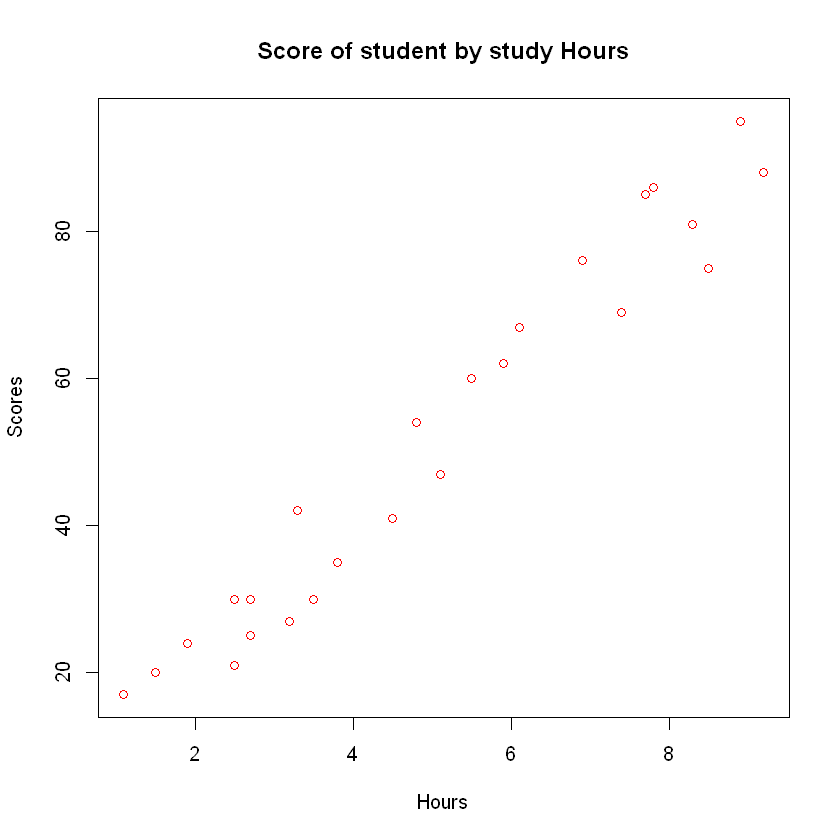

In [3]:
plot(x = student_data$Hours, y = student_data$Scores, xlab = "Hours", ylab = "Scores", main = "Score of student by study Hours", col = "Red")

### Step:-3 Running Linear Regression on the data as there are only Two variables

#### Linear regression 

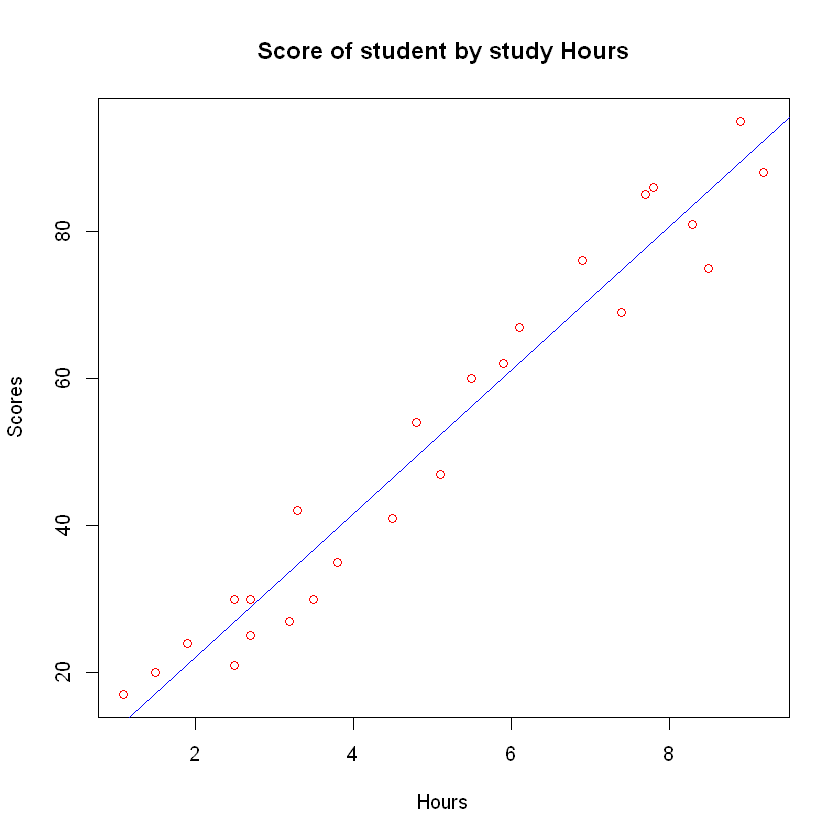

In [4]:
student_data_regression <- lm(formula = Scores~Hours , data = student_data)
plot(x = student_data$Hours, y = student_data$Scores, xlab = "Hours", ylab = "Scores", main = "Score of student by study Hours", col = "red")
abline(student_data_regression, col= "Blue")

In [5]:
summary(student_data_regression)


Call:
lm(formula = Scores ~ Hours, data = student_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.578  -5.340   1.839   4.593   7.265 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4837     2.5317   0.981    0.337    
Hours         9.7758     0.4529  21.583   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.603 on 23 degrees of freedom
Multiple R-squared:  0.9529,	Adjusted R-squared:  0.9509 
F-statistic: 465.8 on 1 and 23 DF,  p-value: < 2.2e-16


### Step:- 4 Splitting Data into Test and Training Data

In [16]:
install.packages("caTools")
library(caTools)

also installing the dependency 'bitops'



package 'bitops' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\YouGet\AppData\Local\Temp\Rtmps7p1nX\downloaded_packages


Warning message:
"package 'caTools' was built under R version 3.6.3"

In [18]:
split = sample.split(Y = student_data$Scores, SplitRatio = 0.75)
  training_set = subset(student_data, split == TRUE)
  test_set = subset(student_data, split==FALSE)
  

In [19]:
 training_set # checking the training data

,Hours,Scores
2,5.1,47
3,3.2,27
4,8.5,75
5,3.5,30
6,1.5,20
8,5.5,60
9,8.3,81
11,7.7,85
12,5.9,62
13,4.5,41


In [20]:
test_set# checking the test data

,Hours,Scores
1,2.5,21
7,9.2,88
10,2.7,25
15,1.1,17
17,2.5,30
23,3.8,35
24,6.9,76


### Step:- 5 Training the dataset 

In [22]:
result <- lm(formula = Scores~Hours, data = training_set)
summary(result)


Call:
lm(formula = Scores ~ Hours, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.841  -5.787   1.979   4.489   6.987 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.9304     3.5716    0.82    0.424    
Hours         9.7542     0.6118   15.94 3.05e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.961 on 16 degrees of freedom
Multiple R-squared:  0.9408,	Adjusted R-squared:  0.9371 
F-statistic: 254.2 on 1 and 16 DF,  p-value: 3.054e-11


In [23]:
 result$coefficients

(Intercept)       Hours 
   2.930351    9.754179

### Step:- 6 Using the Test Data to predict the outcome 

In [27]:
pred <- predict(result, test_set)
 head(pred) #printing the predicted result

1        7       10       15       17       23 
27.31580 92.66880 29.26663 13.65995 27.31580 39.99623

In [26]:
 head(test_set) # printing the head of test set to compare with predicted values

,Hours,Scores
1,2.5,21
7,9.2,88
10,2.7,25
15,1.1,17
17,2.5,30
23,3.8,35


### Step:- 7 Calculating the Mean Absolute Error 

#### taking the head values of original test set

In [28]:
 tset <- head(training_set)
  tset

,Hours,Scores
2,5.1,47
3,3.2,27
4,8.5,75
5,3.5,30
6,1.5,20
8,5.5,60


#### taking the head values of predicted set

In [29]:
pset <- head(test_set)
  pset

,Hours,Scores
1,2.5,21
7,9.2,88
10,2.7,25
15,1.1,17
17,2.5,30
23,3.8,35


#### Calculating Mean Absolute Error

In [31]:
install.packages("ie2misc")
library(ie2misc)

also installing the dependencies 'fastmap', 'cachem', 'proftools', 'zip', 'memoise', 'NCmisc', 'openxlsx', 'gWidgets2', 'gWidgets2tcltk', 'mgsub', 'reader'




  There are binary versions available but the source versions are later:
         binary source needs_compilation
cachem    1.0.4  1.0.6              TRUE
zip       2.1.1  2.2.0              TRUE
openxlsx  4.2.3  4.2.4              TRUE
mgsub     1.7.2  1.7.3             FALSE

  Binaries will be installed
package 'fastmap' successfully unpacked and MD5 sums checked
package 'cachem' successfully unpacked and MD5 sums checked
package 'proftools' successfully unpacked and MD5 sums checked
package 'zip' successfully unpacked and MD5 sums checked
package 'memoise' successfully unpacked and MD5 sums checked
package 'NCmisc' successfully unpacked and MD5 sums checked
package 'openxlsx' successfully unpacked and MD5 sums checked
package 'gWidgets2' successfully unpacked and MD5 sums checked
package 'gWidgets2tcltk' successfully unpacked and MD5 sums checked
package 'reader' successfully unpacked and MD5 sums checked
package 'ie2misc' successfully unpacked and MD5 sums checked

The downloaded

installing the source package 'mgsub'

Warning message:
"package 'ie2misc' was built under R version 3.6.3"

In [32]:
 mae(pset$Hours, tset$Hours)

[1] 3.25

### Step:- 8 What will be predicted score if a student studies for 9.25 hrs/ day? 

In [33]:
 predicted_result <- predict(result, data.frame(Hours = 9.25))
  predicted_result

1 
93.15651

### Conclusion

#### We can conclude that if a student study for 9.25 Hrs/day then he can score upto 93.15%.

## Thank you